In [4]:
%pip install gdown

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import gdown 
gdown.download('https://drive.google.com/uc?id=1_JUP1EYc4r1jgNpeLh7mMQxsKOsT-pcs', 'Invoices.csv')
gdown.download('https://drive.google.com/uc?id=1n6ePaU-cPfzhBKnSeGeynAxR9IYmCS0w', 'Customers.json')

Note: you may need to restart the kernel to use updated packages.


Downloading...
From: https://drive.google.com/uc?id=1_JUP1EYc4r1jgNpeLh7mMQxsKOsT-pcs
To: c:\Users\franz\Desktop\ITMGT\Invoices.csv
100%|██████████| 6.17M/6.17M [00:00<00:00, 8.77MB/s]
Downloading...
From: https://drive.google.com/uc?id=1n6ePaU-cPfzhBKnSeGeynAxR9IYmCS0w
To: c:\Users\franz\Desktop\ITMGT\Customers.json
100%|██████████| 342k/342k [00:00<00:00, 3.60MB/s]


'Customers.json'

Easy 1: How many unique customers are in the dataset 

In [19]:
invoices = pd.read_csv('Invoices.csv')
customers = pd.read_csv('Customers.csv')

unique_customers = invoices['customer_id'].nunique()
print("Number of unique customers: ", unique_customers)

Number of unique customers:  5191


Easy 2: What are the different categories of products available? How many unique categories are there?

In [17]:
invoices = pd.read_csv('Invoices.csv')
category = invoices['category'].unique()
print("Categories of products available:", category )
num_categories = invoices['category'].nunique()
print("Number of unique categories:", num_categories)

Categories of products available: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique categories: 8


Easy 3: Which payment method is the most popular? How many times was it used?

In [22]:
invoices = pd.read_csv('Invoices.csv')
payment_method = invoices['payment_method'].value_counts()
most_popular_payment = payment_method.idxmax()
most_popular_count = payment_method.max()
print("Most popular payment method:", most_popular_payment)
print("How many times it was used:", most_popular_count)

Most popular payment method: Cash
How many times it was used: 44447


Medium 1: What are the three most popular categories, by total sales?

In [24]:
invoices = pd.read_csv('Invoices.csv')
num_each_category = invoices['category'].value_counts()
top3_category = num_each_category.nlargest(3)
print("The 3 most popular categories:", top3_category)

The 3 most popular categories: category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Name: count, dtype: int64


Medium 2: What are the total sales attributed to customers over the age of 45?

In [24]:
invoices = pd.read_csv('Invoices.csv')
customers = pd.read_json('Customers.json')

print("Invoices columns:", invoices.columns.tolist()) # check the column names in the Invoices.csv
customers = pd.read_json('Customers.json')  # check the column names in the Customers.json
print("Customers columns:" , customers.columns.tolist())

merged = pd.merge(invoices, customers, left_on='customer_id', right_on='id')
over_45 = merged[merged['age'] > 45]
total_sales = over_45['price'].sum()

print("Total sales attributed to customers over the age of 45:", total_sales)

Invoices columns: ['invoice_no', 'customer_id', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall']
Customers columns: ['age', 'first_name', 'gender', 'id', 'last_name']
Total sales attributed to customers over the age of 45: 22370553.269999996


Medium 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

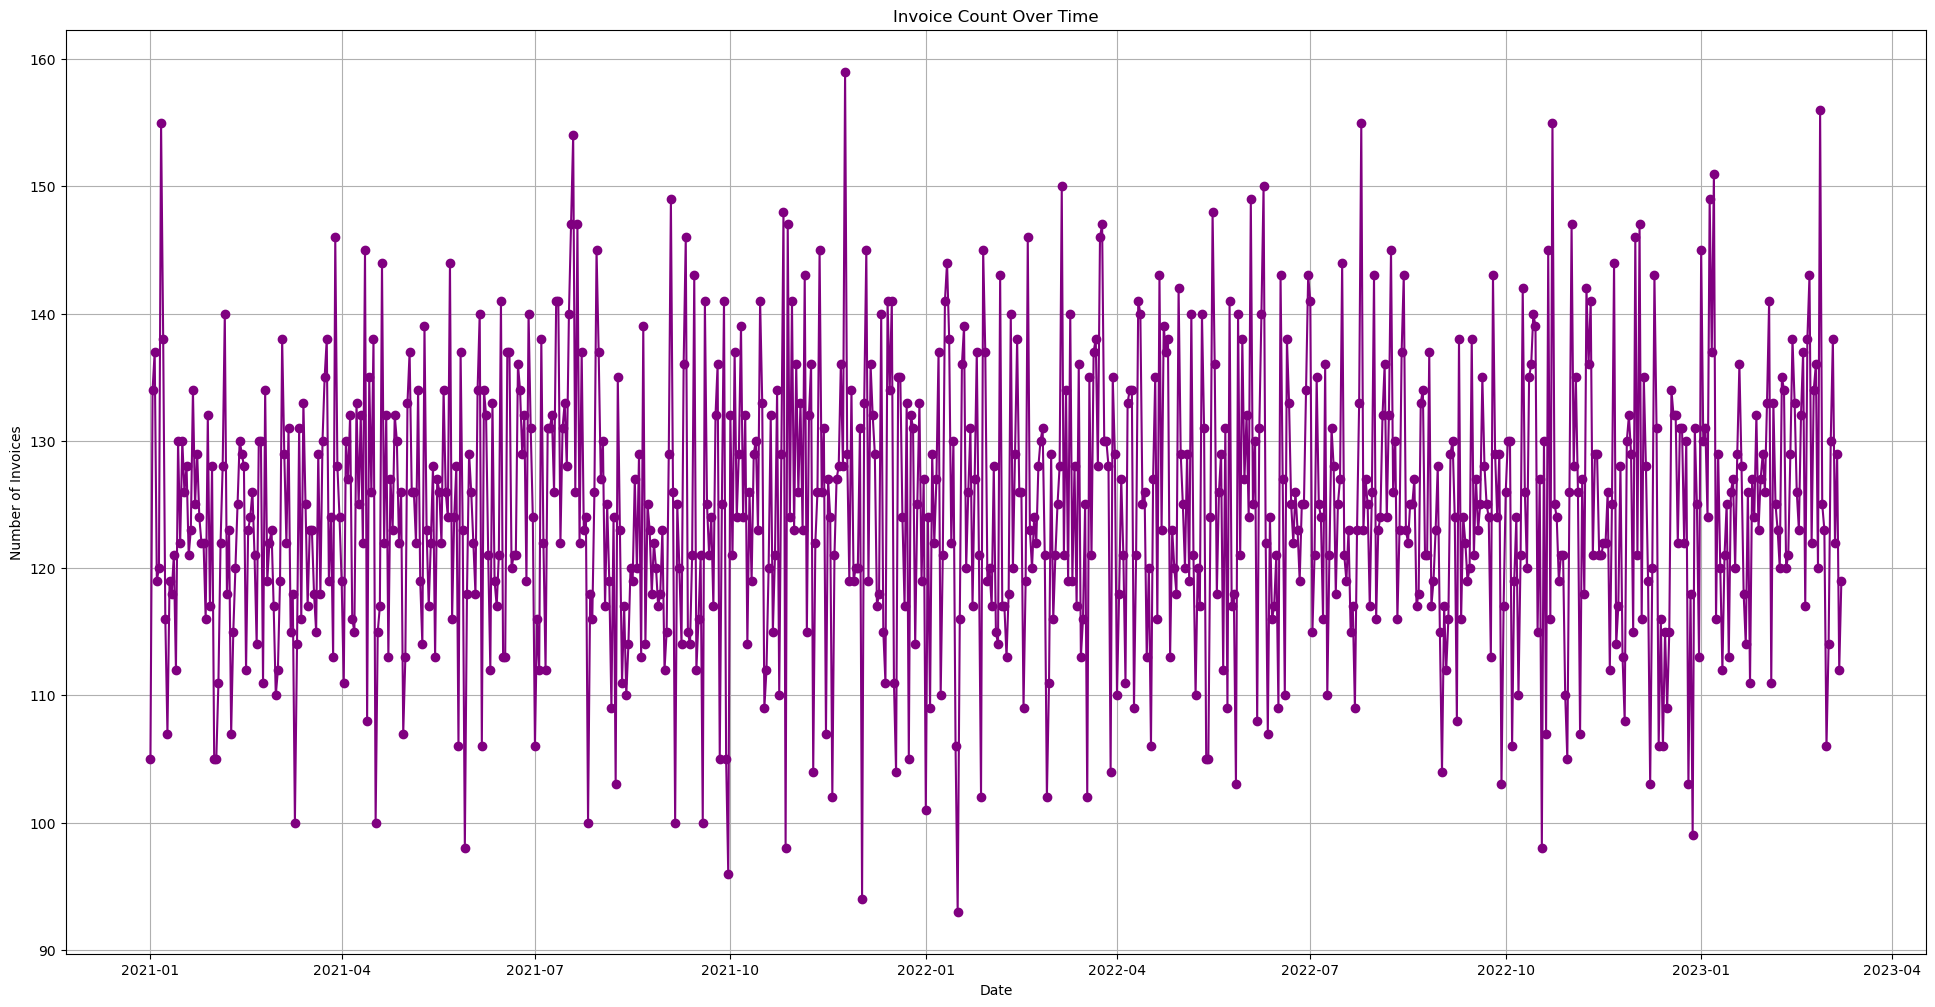

In [ ]:
invoices = pd.read_csv("Invoices.csv")

invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'], dayfirst=True) #convert to proper format
daily_counts = invoices.groupby('invoice_date').size() #group by date and count

# Plot in graph
plt.figure(figsize=(24, 12))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', color='purple')
plt.title("Invoice Count Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Invoices")
plt.grid(True)
plt.show()

Hard: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [24]:
invoices = pd.read_csv("Invoices.csv")
customers = pd.read_json("Customers.json")

merged = pd.merge(invoices, customers, left_on='customer_id', right_on='id')
merged['age_decade'] = (merged['age'].fillna(0) // 10) * 10
merged['age_range'] = merged['age_decade'].astype(int).astype(str) + "-" + (merged['age_decade'] + 9).astype(int).astype(str)

print(merged.columns)

pivot_table = pd.pivot_table(
    merged,
    index='category',
    columns='age_range',
    values='price',
    aggfunc='sum', #sum of prices in each group
    fill_value=0, #fill NaN with 0
    margins=True, #add totals
    margins_name='Total' #name of the totals row/column
)

print(pivot_table)


Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall', 'age', 'first_name',
       'gender', 'id', 'last_name', 'age_decade', 'age_range'],
      dtype='object')
age_range                0-9       10-19       20-29       30-39       40-49  \
category                                                                       
Books               90339.45     3469.35    21619.05    22997.70    23361.30   
Clothing         12537042.32   518238.16  2818351.36  3074919.76  3066817.60   
Cosmetics          751518.78    29681.80   165079.60   198054.86   181343.60   
Food & Beverage     93569.93     3645.31    20428.38    23744.20    24460.71   
Shoes             7301068.05   274277.69  1630061.72  1912141.62  1889335.16   
Souvenir            72984.06     3296.13    15295.92    17548.08    17759.22   
Technology        6481650.00   287700.00  1426950.00  1669500.00  1630650.00   
Toys               432947.20    17203.20   102